In [104]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

taxi_df = pd.read_csv('clean_data/TaxiData_Jan17-Jun17.gz', compression = 'gzip')

In [105]:
taxi_df.shape

(1471188, 17)

In [106]:
taxi_dt = taxi_df.set_index(pd.to_datetime(taxi_df['tpep_pickup_datetime']))

In [107]:
taxi_dt.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
tpep_pickup_datetime,,,,,,,,,,,,,,,,,
2017-01-01 00:00:05,2,2017-01-01 00:00:05,2017-01-01 00:15:36,1,8.47,1,N,138,262,1,24.0,0.5,0.5,7.71,5.54,0.3,38.55
2017-01-01 00:00:12,1,2017-01-01 00:00:12,2017-01-01 00:09:48,1,5.30,1,N,138,192,2,16.0,0.5,0.5,0.00,0.00,0.3,17.30
2017-01-01 00:00:17,2,2017-01-01 00:00:17,2017-01-01 00:19:40,2,13.97,1,N,138,181,1,37.5,0.5,0.5,11.64,0.00,0.3,50.44
2017-01-01 00:00:21,1,2017-01-01 00:00:21,2017-01-01 00:12:09,1,6.90,1,N,138,80,2,20.0,0.5,0.5,0.00,0.00,0.3,21.30
2017-01-01 00:00:33,1,2017-01-01 00:00:33,2017-01-01 00:31:58,2,10.50,1,N,138,230,2,35.5,0.5,0.5,0.00,5.54,0.3,42.34


In [108]:
taxi_hour = taxi_dt.resample('H').VendorID.count()

In [109]:
taxi_hour.head()

tpep_pickup_datetime
2017-01-01 00:00:00    53
2017-01-01 01:00:00     3
2017-01-01 02:00:00     0
2017-01-01 03:00:00     4
2017-01-01 04:00:00     4
Freq: H, Name: VendorID, dtype: int64

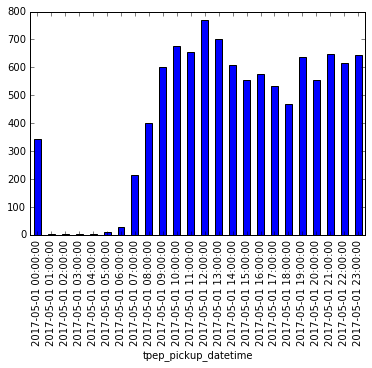

In [111]:
taxi_hour.loc['2017-05-01'].plot(kind='bar')

In [112]:
taxi_day = taxi_dt.resample('D').VendorID.count()

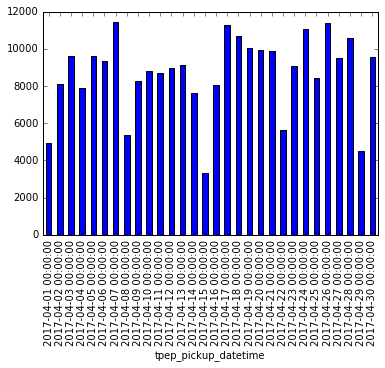

In [113]:
taxi_day.loc['2017-04'].plot(kind='bar')

In [114]:
taxi_week = taxi_dt.resample('W').count()

In [115]:
taxi_week.head()

tpep_pickup_datetime
2017-01-01     5710
2017-01-08    45955
2017-01-15    48753
2017-01-22    49239
2017-01-29    47121
Freq: W-SUN, Name: VendorID, dtype: int64

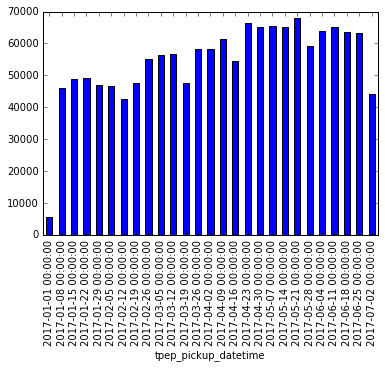

In [116]:
taxi_week.loc['2017'].plot(kind='bar')

In [77]:
weather = pd.read_csv('clean_data/weather_NY.csv')

In [62]:
weather.head()

,dt,dt_iso,city_id,city_name,lat,lon,temp,temp_min,temp_max,pressure,...,rain_today,snow_1h,snow_3h,snow_24h,snow_today,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1349096400,2012-10-01 13:00:00 +0000 UTC,5128581,NaN,NaN,NaN,288.22,286.15,294.26,1012,...,NaN,NaN,NaN,NaN,NaN,20,801,Clouds,few clouds,02d
1,1349186400,2012-10-02 14:00:00 +0000 UTC,5128581,NaN,NaN,NaN,290.15,288.15,294.82,1012,...,NaN,NaN,NaN,NaN,NaN,20,801,Clouds,few clouds,02d
2,1349190000,2012-10-02 15:00:00 +0000 UTC,5128581,NaN,NaN,NaN,291.32,289.82,296.48,1012,...,NaN,NaN,NaN,NaN,NaN,20,801,Clouds,few clouds,02d
3,1349193600,2012-10-02 16:00:00 +0000 UTC,5128581,NaN,NaN,NaN,291.78,290.15,295.93,0,...,0.0,NaN,NaN,NaN,NaN,92,800,Clear,sky is clear,02d
4,1349197200,2012-10-02 17:00:00 +0000 UTC,5128581,NaN,NaN,NaN,292.74,291.15,296.48,0,...,0.0,NaN,NaN,NaN,NaN,92,800,Clear,sky is clear,02d


In [69]:
pd.value_counts(weather['snow_1h'])

0.30    9
0.13    8
0.51    4
2.10    4
0.20    4
0.25    4
3.05    4
0.11    3
0.47    3
0.07    3
0.76    3
0.03    3
0.08    2
0.38    2
0.44    1
0.36    1
Name: snow_1h, dtype: int64

In [78]:
weather.drop(['city_id', 'city_name', 'lat', 'lon', 'weather_icon', 'grnd_level', 'sea_level', 'clouds_all', 'weather_id'], axis=1, inplace=True)

In [80]:
weather['dt_iso'].dtype

dtype('O')

In [84]:
weather_dt = weather.set_index(pd.to_datetime(weather['dt'], unit='s'))

In [85]:
weather_dt.head()

,dt,dt_iso,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,rain_24h,rain_today,snow_1h,snow_3h,snow_24h,snow_today,weather_main,weather_description
dt,,,,,,,,,,,,,,,,,,,
2012-10-01 13:00:00,1349096400,2012-10-01 13:00:00 +0000 UTC,288.22,286.15,294.26,1012,58,7,260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clouds,few clouds
2012-10-02 14:00:00,1349186400,2012-10-02 14:00:00 +0000 UTC,290.15,288.15,294.82,1012,51,5,270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clouds,few clouds
2012-10-02 15:00:00,1349190000,2012-10-02 15:00:00 +0000 UTC,291.32,289.82,296.48,1012,52,5,270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clouds,few clouds
2012-10-02 16:00:00,1349193600,2012-10-02 16:00:00 +0000 UTC,291.78,290.15,295.93,0,0,2,303,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,Clear,sky is clear
2012-10-02 17:00:00,1349197200,2012-10-02 17:00:00 +0000 UTC,292.74,291.15,296.48,0,0,1,285,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,Clear,sky is clear


In [101]:
weather_dt.index.max()

Timestamp('2017-10-21 00:00:00')